# Electron Charge to Mass Ratio Experimental Results

The purpose of this experiment was to derive the charge to mass ratio, e/m, of an electron. 

My lab partner, Robert Pielar, and I recorded ten measurements of e/m.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
from IPython.display import HTML
plt.rc("savefig",dpi=120)
plt.rcParams['figure.figsize'] = (8, 6)

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [7]:
def standard_error_of_mean(x):
    x = np.array(x)
    n = len(x)
    x_mean = x.mean()
    residuals = x - x_mean
    residuals_squared = residuals**2
    sum_of_squares_of_residuals = residuals_squared.sum()
    s = np.sqrt(sum_of_squares_of_residuals/n)
    return (1/(n-1))**(1/2) * s

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 7.5,
        }
axis_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 12,
        } 
font_big = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }   
    
mu_0 = 4*np.pi /(10**7)
N = 130
d = .16
emaccepted = 1.758819E11

def trial(V,I,R):                              
    return [eoverm(V,I,R),R,r_accepted(V,I),
            V,I,B(I)]


def B(I):
     return (mu_0 * 8 *I * 130) / (np.sqrt(125)*.16)
def eoverm(V,I,R):
    return (2*V) / (B(I)**2 * R**2)

def r_accepted(V,I):
    return r(V,I,1.7588196E11)

def r_difference(V,I,R):
    return R - r_accepted(V,I)

def r_fractional_difference(V,I,R):
    return (r_difference(V,I,R)/r_accepted(V,I))


def r(V,I,e_over_m):
    return (1/B(I))*np.sqrt(2*V/e_over_m)


        
def eoverm_graph(V,I,R, first = False):
    e_over_m = eoverm(V,I,R)
    #e_over_m_string = '%.4E' % Decimal(str(e_over_m)) 
    X = np.linspace(R-0.005,R+0.005,300)
    Y = (2*V) / (B(I)**2 * X**2)
    
    x_scat_min = r(V,I,1.8588E11)
    #x_scat_min_string = '%.4F' % Decimal(str(x_scat_min))
    
    x_scat_max = r(V,I,1.6588E11)
    #x_scat_max_string = '%.4F' % Decimal(str(x_scat_max))
    
    accepted_r = r(V,I,1.788196E11)
    #accepted_r_string = '%.4F' % Decimal(str(accepted_r))
    
    plt.plot(X,Y,color = 'blue')
    
    if first == True:
        plt.scatter(R,e_over_m,marker = 'o',color='black', label = 'Measured Value')
        
        #plt.scatter(accepted_r,1.7588196E11, marker = '*',
                    #color='black',
                    #label = 'Accepted: $1.788196 \\times 10^{11}$')
               
            
    else:
        
        plt.scatter(R,e_over_m,marker = 'o',color='black')
    
        #plt.scatter(accepted_r,1.7588196E11, marker = '*',
         #           color='black')
               #"(" + accepted_r_string + ',1.7588196E11)')

def eoverm_graph_V(V,I,R, first = False):
    e_over_m = eoverm(V,I,R)
    
    X = np.linspace(V*.95,V*1.05,300)
    Y = (2*X) / (B(I)**2 * R**2)
    
    plt.plot(X,Y,color = 'blue')
    
    if first == True:
        plt.scatter(V,e_over_m,marker = 'o',color='black', label = 'Measured Value')
        
        
    else:
        
        plt.scatter(V,e_over_m,marker = 'o',color='black')
    
        #plt.scatter(accepted_r,1.7588196E11, marker = '*',
         #           color='black')
               #"(" + accepted_r_string + ',1.7588196E11)')
def eoverm_graph_I(V,I,R, first = False):
    e_over_m = eoverm(V,I,R)
    
    X = np.linspace(I-.2,I+.2,300)
    Y = (2*V) / (B(X)**2 * R**2)
    
    plt.plot(X,Y,color = 'blue')
    
    if first == True:
        plt.scatter(I,e_over_m,marker = 'o',color='black', label = 'Measured Value')
        
        
    else:
        
        plt.scatter(I,e_over_m,marker = 'o',color='black')
    
        #plt.scatter(accepted_r,1.7588196E11, marker = '*',
         #           color='black')
               #"(" + accepted_r_string + ',1.7588196E11)')
trial_data = []
trial_data.append(trial(111,1.7,0.029))  
trial_data.append(trial(111,2.0,0.025))      
trial_data.append(trial(110.7,1.12,0.044))   
trial_data.append(trial(151.5,1.120,.05))    
trial_data.append(trial(151.4,1.514, .038))  
trial_data.append(trial(151.2,1.694,.035))   
trial_data.append(trial(151.2, 1.4, .04))    
trial_data.append(trial(114, 1.1, .045 ))    
trial_data.append(trial(114,.900, .055))     
trial_data.append(trial(84.5,0.900,.0475)) 
col = ['e/m (C/kg)','R(m)','R,accepted(m)','V','I(A)','B(T)']
data_ind = []

for i in range(1,11):
    data_ind.append('Trial ' + str(i))

    
def e_over_m_r_plot():
    
    eoverm_graph(111,1.7,0.029,True)
    eoverm_graph(111,2.0,0.025)
    eoverm_graph(110.7,1.12,0.044)
    eoverm_graph(151.5,1.120,.05)  
    eoverm_graph(151.4,1.514, .038)  
    eoverm_graph(151.2,1.694,.035)   
    eoverm_graph(151.2, 1.4, .04)   
    eoverm_graph(114, 1.1, .045)   
    eoverm_graph(114,.900, .055)     
    eoverm_graph(84.5,0.900,.0475)
    plt.hlines(1.7588196E11,0,0.065,linestyles=  'solid',color = 'black', 
               label = 'Accepted: $1.788196 \\times 10^{11} \\frac{C}{kg}$')
   # plt.text(0.0188,2.6E11) #,'Trial 1',fontdict=font)
    #plt.text(0.0224,2.51E11) #,'Trial 2',fontdict=font)
    #plt.text(0.02750,2.22E11) #,'Trial 3', fontdict = font)
    #plt.text(0.030,2.3E11) #'Trial 4',fontdict=font)
   # plt.text(0.033,2.39E11) #'Trial 5',fontdict=font)
    #plt.text(0.036,2.25E11) #'Trial 6',fontdict=font)
    #plt.text(0.038,2.20E11) #'Trial 7',fontdict=font)
    #plt.text(0.041,2.16E11) #'Trial 8',fontdict=font)
    #plt.text(0.044,2.25E11) #'Trial 9',fontdict=font)
    #plt.text(0.0480,2.15E11) #'Trial 10',fontdict=font)
    plt.xlim(0.018,0.060)

    plt.xlabel('R (m)', fontdict = axis_font)
    plt.ylabel('e/m (C/kg)',fontdict = axis_font)
    plt.title("e/m Measurement Orbital Radius Dependency",fontdict = axis_font)
    plt.legend()
    plt.savefig('graphs/eoverm/em_rplot.png')

def level_surface():
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    x = np.linspace(84.0,160.0,30)
    y = np.linspace(.8,2.1,30)
    X, Y = np.meshgrid(x, y)
    Z = r_accepted(X, Y)

    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('V',fontdict = axis_font)
    ax.set_ylabel('I (A)',fontdict = axis_font)
    ax.set_zlabel('R (A)', fontdict = axis_font)
    
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    cmap='viridis', edgecolor='none')
    ax.set_title('Level Surface For Accepted e/m Values ',fontdict = font_big);
    ax.view_init(0, 35)
    plt.savefig('graphs/eoverm/level_surface.png')
    
    plt.show()

def e_over_m_v_plot():
    eoverm_graph_V(111,1.7,0.029,True)
    eoverm_graph_V(111,2.0,0.025)
    eoverm_graph_V(110.7,1.12,0.044)
    eoverm_graph_V(151.5,1.120,.05)  
    eoverm_graph_V(151.4,1.514, .038)  
    eoverm_graph_V(151.2,1.694,.035)   
    eoverm_graph_V(151.2, 1.4, .04)   
    eoverm_graph_V(114, 1.1, .045)   
    eoverm_graph_V(114,.900, .055)     
    eoverm_graph_V(84.5,0.900,.0475)
    plt.hlines(1.7588196E11,84,155,linestyles=  'solid',color = 'black', 
               label = 'Accepted: $1.788196 \\times 10^{11} \\frac{C}{kg}$')
    plt.xlim(80,160)
    plt.xlabel('V', fontdict = axis_font)
    plt.ylabel('e/m (C/kg)',fontdict = axis_font)
    plt.title("e/m Measurement Voltage Dependency",fontdict = axis_font)
    plt.legend()
    plt.savefig('graphs/eoverm/em_vplot')
    
def data_frame():
    return pd.DataFrame(trial_data,index=data_ind,columns=col)

df = pd.DataFrame(trial_data,index=data_ind,columns=col)
eovermvalues = df.values[:,0]

def data_plot():
    chargetomass = data_frame().values[:,0]
    mean = chargetomass.mean()
    X_range = (len(chargetomass) + 1)
    trials = np.arange(1,len(chargetomass)+1)
    plt.scatter(trials,chargetomass[0:X_range], label = "Trial Values")
    plt.hlines(1.758820024*10**11,1,X_range - 1,
           colors='b', 
           label = 'Accepted Value')
    plt.hlines(mean,1,X_range - 1,colors='r',
           label = 'Mean Experimental Value')
    plt.title("Charge To Mass Ratio Measurements")
    plt.xlabel("Trial")
    plt.xticks(np.arange(min(trials), max(trials)+1, 1))
    plt.ylabel("e/m (C/kg)")
    plt.text(4,1.758820024E11+10**8.5,
         "$1.758820024(11) \\times 10^{11} kg/C$")
    plt.text(4.5,mean+10**8.5,
         "$1.72 \\pm .0188 \\times 10^{11} kg/C$")
    plt.legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('graphs/eoverm/data.png')
    

def e_over_m_i_plot():
    eoverm_graph_I(111,1.7,0.029,True)
    eoverm_graph_I(111,2.0,0.025)
    eoverm_graph_I(110.7,1.12,0.044)
    eoverm_graph_I(151.5,1.120,.05)  
    eoverm_graph_I(151.4,1.514, .038)  
    eoverm_graph_I(151.2,1.694,.035)   
    eoverm_graph_I(151.2, 1.4, .04)   
    eoverm_graph_I(114, 1.1, .045)   
    eoverm_graph_I(114,.900, .055)     
    eoverm_graph_I(84.5,0.900,.0475)
    plt.hlines(1.7588196E11,.8,2.0,linestyles=  'solid',color = 'black', 
               label = 'Accepted: $1.788196 \\times 10^{11} \\frac{C}{kg}$')

    plt.xlim(.6,2.1)
    plt.xlabel('I (A)', fontdict = axis_font)
    plt.ylabel('e/m (C/kg)',fontdict = axis_font)
    plt.title("e/m Measurement Current Dependency",fontdict = axis_font)
    plt.xticks(np.arange(0.6,2.1,0.1))
    plt.legend()
    plt.savefig('graphs/eoverm/em_iplot')

def summary_stats():
    mean = eovermvalues.mean()
    standard_error = standard_error_of_mean(eovermvalues)
    #return pd.DataFrame([mean,standard_error])
    print("Mean Value of e/m: {:.2E}".format(mean) + " C/kg")
    print("Standard Error:    {:.2E}".format(standard_error) + " C/kg")

def results_with_confidence_interval():
    chargetomass = eovermvalues
    mean = chargetomass.mean()
    X_range = (len(chargetomass) + 1)
    trials = np.arange(1,len(chargetomass)+1)
    plt.scatter(trials,chargetomass[0:X_range], label = "Trial Values")
    plt.hlines(1.758820024*10**11,1,X_range - 1,colors='b', 
               label ='Accepted Value')
    plt.hlines(mean,1,X_range - 1,colors='r',
               label = 'Mean Experimental Value')
    plt.hlines(mean+1.88E9,1,X_range - 1, colors = 'black',linestyles= 'dashed',
               label = '$1 \\sigma$ Confidence Interval\n       Boundary')
    plt.hlines(mean-1.88E9,1,X_range - 1, colors = 'black',linestyles= 'dashed',
              )
    plt.title("Charge To Mass Ratio Measurements")
    plt.xlabel("Trial")
    plt.xticks(np.arange(min(trials), max(trials)+1, 1))
    plt.ylabel("e/m (C/kg)")
    plt.text(4,1.758820024E11+10**8.5,"$1.758820024(11) \\times 10^{11} kg/C$")
    plt.text(4.5,mean+10**8.5,"$1.72 \\times 10^{11} kg/C$")
    plt.text(4.5,mean+10**8.5+.0188*10**11, "$(1.72+.0188) \\times 10^{11}  kg/C$")
    plt.text(4.5,mean+10**8.5-.0188*10**11, "$(1.72-.0188) \\times 10^{11}  kg/C$")
    plt.legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('graphs/eoverm/datawithconfidenceinterval.png')
    
trials = ('Trial 1','Trial 2','Trial 3','Trial 4', 'Trial 5','Trial 6', 'Trial 7','Trial 8','Trial 9',
             'Trial 10') 

em_relative_to_accepted = ((np.array(data_frame().values[:,0]) - emaccepted)/emaccepted)*100
mean_relative_to_accepted = ((data_frame().values[:,0].mean() - emaccepted)/emaccepted)*100
ind = np.arange(10)  # the x locations for the groups
       # the width of the
width = 0.35
def percent_error():
    fig, ax = plt.subplots()
    ax.bar(ind, em_relative_to_accepted, color='darkred')
    ax.set_ylim(-9,9)
    ax.set_xlim(-1,10.5)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(trials);
    ax.set_title("Percent Error, e/m",fontdict = font_big)
    ax.set_ylabel('% error')
    ax.hlines(0,-1,10.5,color='black')
    ax.hlines(mean_relative_to_accepted,-1,10.5,color='darkred', label = 'Mean % error')
    ax.legend();
    plt.savefig('graphs/eoverm/percent_error.png')
    
def box_plot():
    fig,ax = plt.subplots()
    ax.boxplot(data_frame().values[:,0],medianprops =dict(color='blue'))
    ax.set_ylabel('C/kg',fontdict = axis_font)
    ax.set_title('e/m Measurement Box Plot',fontdict = font_big);

def five_number_summary():
    eom = np.array(data_frame()['e/m (C/kg)'])
    Q1 = np.percentile(eom,25)
    median = np.percentile(eom,50)
    mean = eom.mean()
    Q3 = np.percentile(eom,75)
    ind = ['min','25th percentile','median','75th percentile','max']
    df = pd.DataFrame([eom.min(),Q1,median,Q3,eom.max()],index=ind, columns = ['(C/kg)'])
    df.columns.name = 'Five Number Summary'
    return df
    #if (median > mean):
        #ind = ['min','25th percentile','mean','median','75th percentile','max']
        #return pd.DataFrame([eom.min(),Q1,mean,median,Q3,eom.max()],index=ind, columns = ['(C/kg)'])
    #else:
     #   if (mean < Q3):
      #      ind = ['min','25th percentile','media','mean','75th percentile','max']
       #     return pd.DataFrame([eom.min(),Q1,median,mean,Q3,eom.max()],index=ind, columns = ['(C/kg)'])
        #else:
         #   ind = ['min','25th percentile','median','75th percentile','mean','max']
          #  return pd.DataFrame([eom.min(),Q1,median,Q3,mean,eom.max()],index = ind, columns = ['(C/kg)'])
            
    

In [8]:
data_frame()

,e/m (C/kg),R(m),"R,accepted(m)",V,I(A),B(T)
Trial 1,1.711286e+11,0.0290,0.028605,111.0,1.700,0.001242
Trial 2,1.663706e+11,0.0250,0.024315,111.0,2.000,0.001461
Trial 3,1.708047e+11,0.0440,0.043360,110.7,1.120,0.000818
Trial 4,1.810215e+11,0.0500,0.050725,151.5,1.120,0.000818
Trial 5,1.713959e+11,0.0380,0.037512,151.4,1.514,0.001106
Trial 6,1.611694e+11,0.0350,0.033504,151.2,1.694,0.001238
Trial 7,1.806630e+11,0.0400,0.040540,151.2,1.400,0.001023
Trial 8,1.743364e+11,0.0450,0.044802,114.0,1.100,0.000804
Trial 9,1.743364e+11,0.0550,0.054758,114.0,0.900,0.000658
Trial 10,1.732519e+11,0.0475,0.047144,84.5,0.900,0.000658


In [9]:
summary_stats()

Mean Value of e/m: 1.72E+11 C/kg
Standard Error:    1.88E+09 C/kg


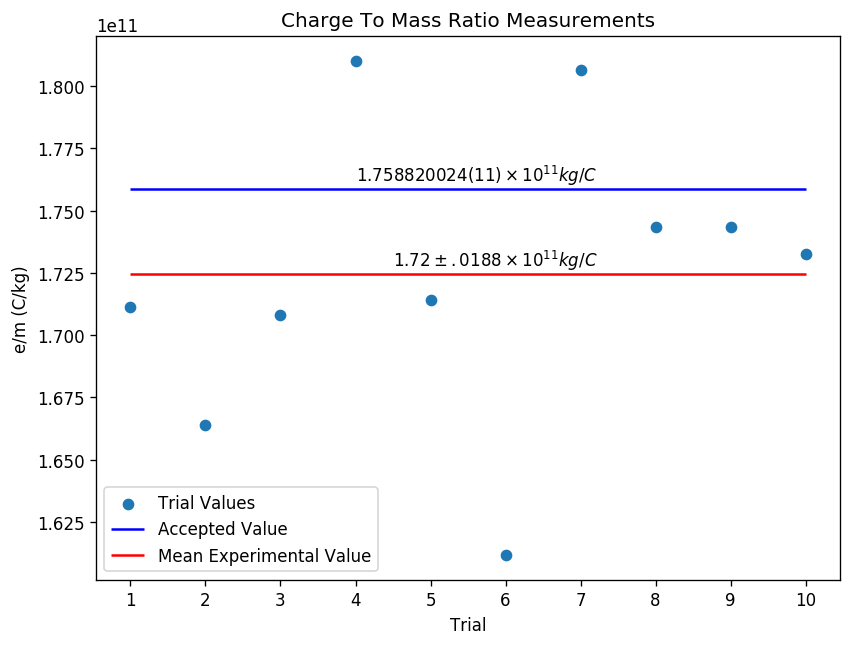

In [10]:
data_plot()

### Function  For Calculating the Std.Error of the Mean:
```python
def standard_error_of_mean(x): 
    '''x must be a list or any any sequence of values
       whose standard error of the mean you want to 
       calculate/
    '''
    x = np.array(x)
    n = len(x) # n is the number of measurements
    x_mean = x.mean() 
    residuals = x - x_mean 
    residuals_squared = residuals**2
    sum_of_squares_of_residuals = residuals_squared.sum()
    s = np.sqrt(sum_of_squares_of_residuals/n)
    return (1/(n-1))**(1/2) * s 
    ```
If $x_i$ stands for the ith measurement of a value 'x' and $\bar{x}$ stands for the mean value of $n$ measurements of x, the standard error of the mean, $\sigma_m$ is given by
$$\sigma_m = \sqrt{\left(\frac{1}{n-1}\right)}\cdot 
\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2}}$$

That is the equation that my function, *standard_error_of_mean* uses to calculate the standard error of the mean.

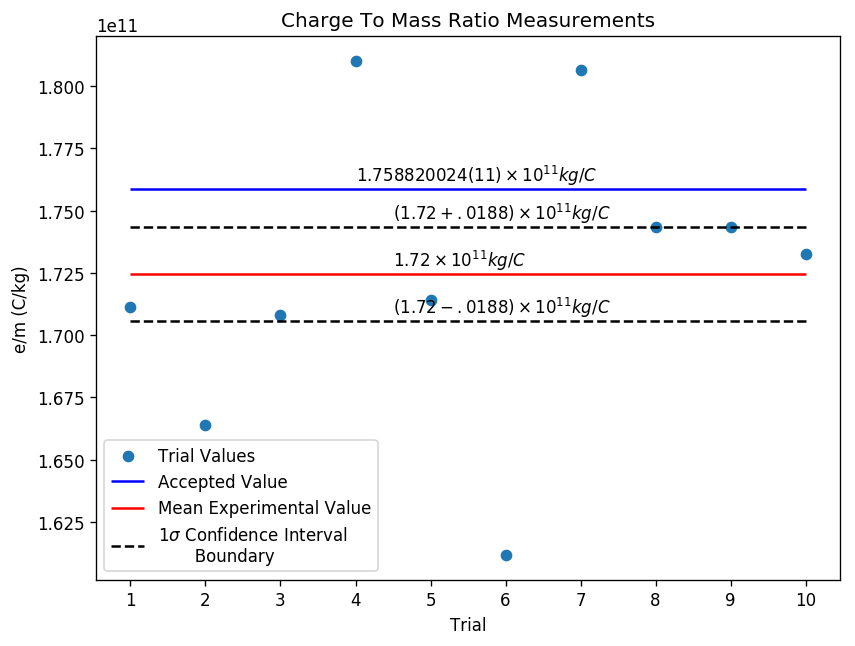

In [11]:
results_with_confidence_interval()


<br><br>
$$\%\mathrm{error} = \frac{\text{measured value of e/m - accepted value of e/m}}{\text{accepted value of e/m}}
                        \cdot 100$$

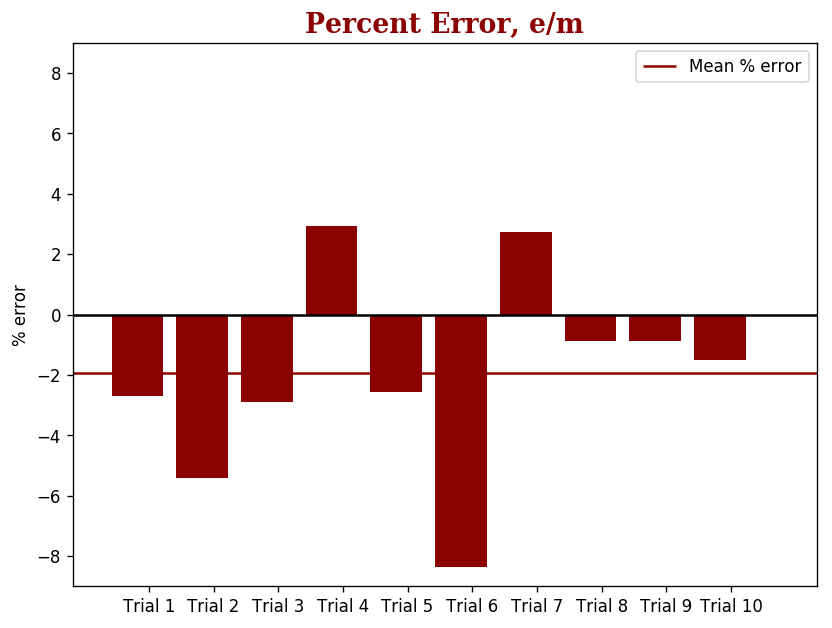

In [12]:
percent_error()

In [13]:
five_number_summary()

Five Number Summary,(C/kg)
min,1.611694e+11
25th percentile,1.708857e+11
median,1.723239e+11
75th percentile,1.743364e+11
max,1.810215e+11


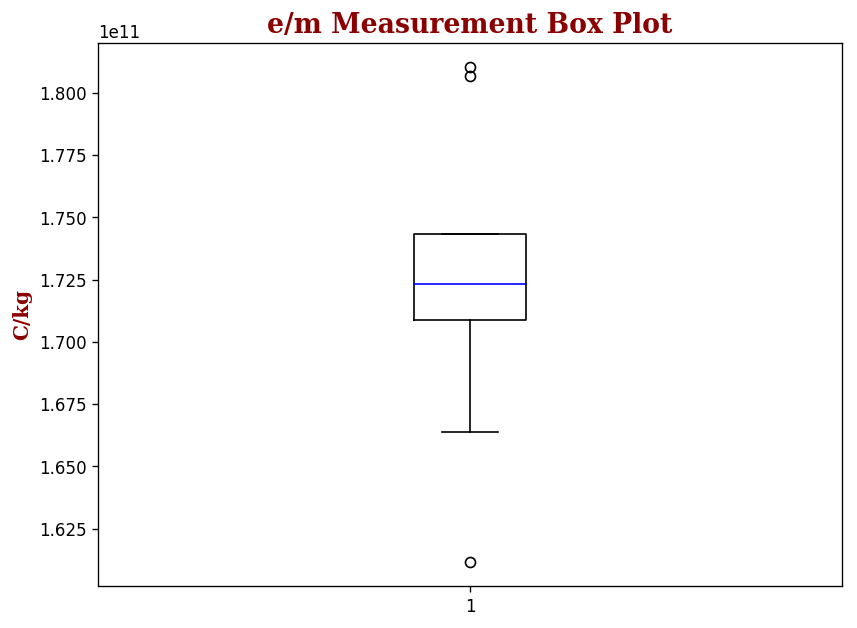

In [14]:
box_plot()

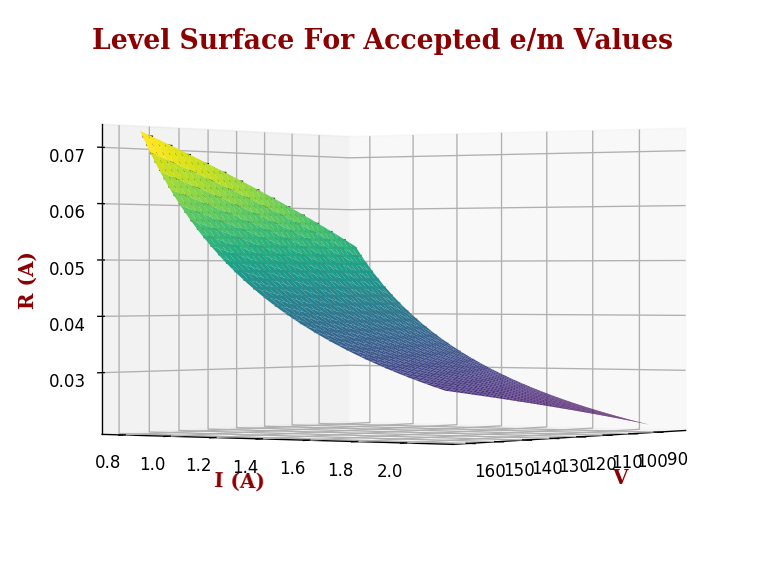

In [15]:
level_surface()

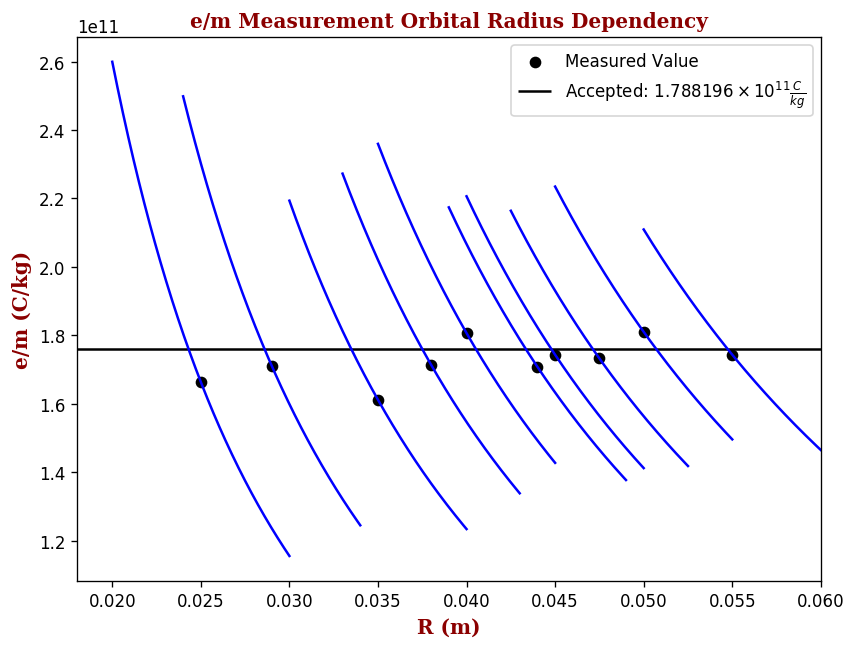

In [16]:
e_over_m_r_plot()

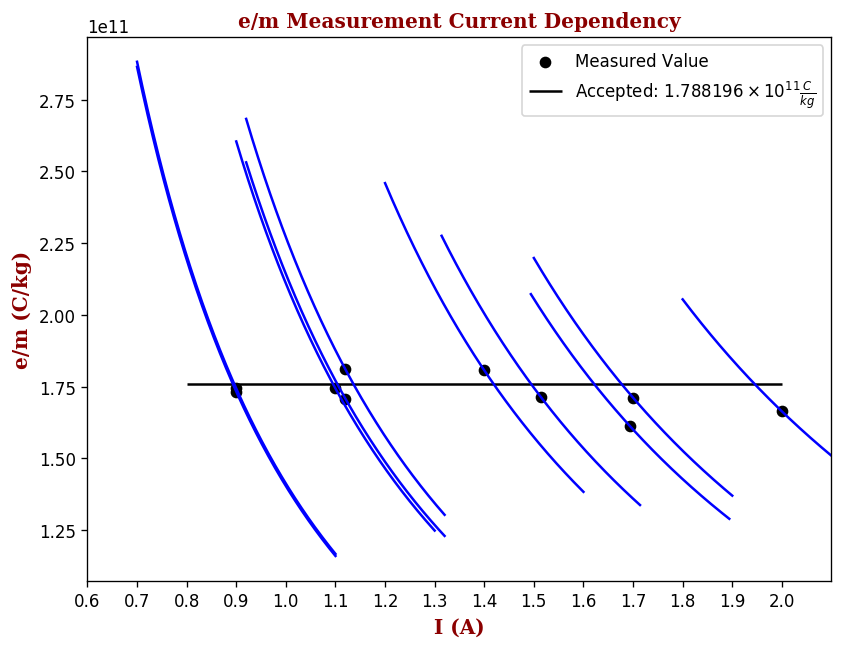

In [17]:
e_over_m_i_plot()

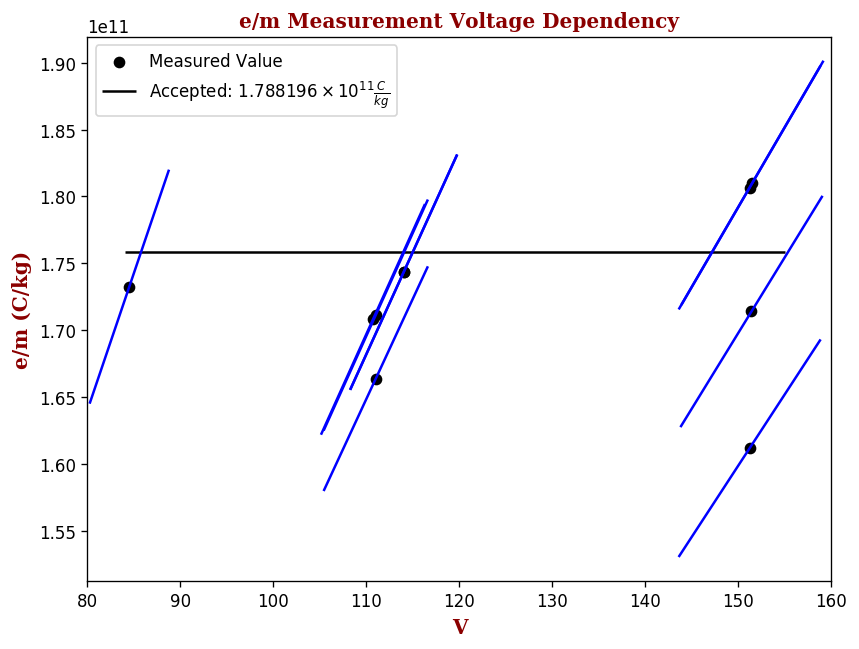

In [18]:
e_over_m_v_plot()